## Random Forest

Random Forest is an ensemble of Decision Trees. With a few exceptions, a `RandomForestClassifier` has all the hyperparameters of a `DecisionTreeClassifier` (to control how trees are grown), plus all the hyperparameters of a `BaggingClassifier` to control the ensemble itself.

The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a random subset of features. This results in a greater tree diversity, which (once again) trades a higher bias for a lower variance, generally yielding an overall better model. The following `BaggingClassifier` is roughly equivalent to the previous `RandomForestClassifier`:

## Coronavirus
Coronavirus disease (COVID-19) is an infectious disease caused by a new virus.
The disease causes respiratory illness (like the flu) with symptoms such as a cough, fever, and in more severe cases, difficulty breathing. You can protect yourself by washing your hands frequently, avoiding touching your face, and avoiding close contact (1 meter or 3 feet) with people who are unwell. An outbreak of COVID-19 started in December 2019 and at the time of the creation of this project continues to spread throughout the world. Many governments are recommending only essential outings to public places and most business that do not serve food or sell essential items are closed. An excellent [spatial dashboard](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6) built by Johns Hopkins shows the daily confirmed cases by country. 

In this mini project using the Random Forest Classifier and a dataset from the South Korean cases of COVID-19 provided on [Kaggle](https://www.kaggle.com/kimjihoo/coronavirusdataset) to encourage research on the topic. The goal will be to build a Random Forest Classifier to predict the 'state' of the patient.

First we load the needed packages and modules into python. Then we will load the data into a pandas data frame for ease of use.

In [1]:
import os
import pandas as pd
from datetime import datetime,timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.graph_objects as go
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url ='SouthKoreacoronavirusdataset/PatientInfo.csv'
df = pd.read_csv(url)
df.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released


In [3]:
df.shape

(2218, 18)

In [4]:
#Counts of null values 
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,disease,2199
1,deceased_date,2186
2,infection_order,2176
3,symptom_onset_date,2025
4,released_date,1995
5,contact_number,1807
6,infected_by,1749
7,infection_case,1055
8,global_num,904
9,birth_year,454


In [5]:
#counts of response variable values
df.state.value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

 **<font color='teal'> Create a new column named 'n_age' which is the calculated age based on the birth year column.</font>**

In [6]:
df['n_age'] = 2020 - df.birth_year

### Handle Missing values

 **<font color='teal'> Print the number of missing values by column.</font>**

In [7]:
df.isnull().sum()

patient_id               0
global_num             904
sex                    145
birth_year             454
age                    261
country                  0
province                 0
city                    65
disease               2199
infection_case        1055
infection_order       2176
infected_by           1749
contact_number        1807
symptom_onset_date    2025
confirmed_date         141
released_date         1995
deceased_date         2186
state                   88
n_age                  454
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

 **<font color='teal'> Fill the 'disease' missing values with 0 and remap the True values to 1.</font>**

In [9]:
df.disease=df.disease.fillna(0).astype('category').cat.codes

 **<font color='teal'> Fill null values in following columns with their mean: 'global_number','birth_year','infection_order','infected_by'and 'contact_number'</font>**

In [10]:
df.birth_year = df.birth_year.fillna(df.birth_year.mean())
df.infection_order = df.infection_order.fillna(df.infection_order.mean())
df.infected_by = df.infected_by.fillna(df.infected_by.mean())
df.contact_number = df.contact_number.fillna(df.contact_number.mean())
df.global_num = df.global_num.fillna(df.global_num.mean())

 **<font color='teal'> Fill the rest of the missing values with any method.</font>**

In [11]:
def impute_na(df):
    du = df.select_dtypes(include=['object'])
    imp = IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
        random_state=0),missing_values=np.nan, sample_posterior=False, 
        max_iter=10, tol=0.001,n_nearest_features=4, initial_strategy='median')
    imp.fit(df._get_numeric_data())
    imputed_data = pd.DataFrame(imp.transform(df._get_numeric_data()),
                                columns = df._get_numeric_data().columns)
    
    outdf = imputed_data.merge(du,left_index=True,right_index=True).fillna('missing')
    return outdf

df = impute_na(df)

 **<font color='teal'> Check for any remaining null values.</font>**

In [12]:
df.isnull().sum()

patient_id            0
global_num            0
birth_year            0
disease               0
infection_order       0
infected_by           0
contact_number        0
n_age                 0
sex                   0
age                   0
country               0
province              0
city                  0
infection_case        0
symptom_onset_date    0
confirmed_date        0
released_date         0
deceased_date         0
state                 0
dtype: int64

In [13]:
df.head()

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex,age,country,province,city,infection_case,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1.000000e+09,2.0,1964.0,0.0,1.0,2.600789e+09,75.0,56.0,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,2020-01-22,2020-01-23,2020-02-05,missing,released
1,1.000000e+09,5.0,1987.0,0.0,1.0,2.600789e+09,31.0,33.0,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,missing,2020-01-30,2020-03-02,missing,released
2,1.000000e+09,6.0,1964.0,0.0,2.0,2.002000e+09,17.0,56.0,male,50s,Korea,Seoul,Jongno-gu,contact with patient,missing,2020-01-30,2020-02-19,missing,released
3,1.000000e+09,7.0,1991.0,0.0,1.0,2.600789e+09,9.0,29.0,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,2020-01-26,2020-01-30,2020-02-15,missing,released
4,1.000000e+09,9.0,1992.0,0.0,2.0,1.000000e+09,2.0,28.0,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,missing,2020-01-31,2020-02-24,missing,released


Remove date columns from the data


In [14]:
df = df.drop(['symptom_onset_date','confirmed_date','released_date','deceased_date'],axis =1)

Review the count of unique values by column

In [15]:
print(df.nunique())

patient_id         2218
global_num         1304
birth_year           97
disease               2
infection_order       7
infected_by         207
contact_number       73
n_age                98
sex                   3
age                  12
country               4
province             17
city                135
infection_case       17
state                 4
dtype: int64


Review the percent of unique values by column

In [16]:
print(df.nunique()/df.shape[0])

patient_id         1.000000
global_num         0.587917
birth_year         0.043733
disease            0.000902
infection_order    0.003156
infected_by        0.093327
contact_number     0.032913
n_age              0.044184
sex                0.001353
age                0.005410
country            0.001803
province           0.007665
city               0.060866
infection_case     0.007665
state              0.001803
dtype: float64


Review the range of values per column

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,2218.0,4.014678e+09,2.192419e+09,1.000000e+09,1.700000e+09,6.001000e+09,6.004000e+09,7.000000e+09
global_num,2218.0,4.664817e+03,2.211785e+03,1.000000e+00,4.205250e+03,4.664817e+03,5.900250e+03,8.717000e+03
birth_year,2218.0,1.974989e+03,1.731123e+01,1.916000e+03,1.965000e+03,1.974989e+03,1.988000e+03,2.020000e+03
disease,2218.0,8.566276e-03,9.217769e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
infection_order,2218.0,2.285714e+00,1.706622e-01,1.000000e+00,2.285714e+00,2.285714e+00,2.285714e+00,6.000000e+00
infected_by,2218.0,2.600789e+09,7.216328e+08,1.000000e+09,2.600789e+09,2.600789e+09,2.600789e+09,6.113000e+09
contact_number,2218.0,2.412895e+01,3.917141e+01,0.000000e+00,2.412895e+01,2.412895e+01,2.412895e+01,1.160000e+03
n_age,2218.0,4.503039e+01,1.731132e+01,0.000000e+00,3.200000e+01,4.510000e+01,5.500000e+01,1.040000e+02


### Check for duplicated rows

In [18]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age,sex,age,country,province,city,infection_case,state


Print the categorical columns and their associated levels.

In [19]:
dfo = df.select_dtypes(include=['object'], exclude=['datetime'])
dfo.shape
#get levels for all variables
vn = pd.DataFrame(dfo.nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn.sort_values(by='LevelsCount', ascending =False)
vn

,VarName,LevelsCount
0,sex,3
1,age,12
2,country,4
3,province,17
4,city,135
5,infection_case,17
6,state,4


**<font color='teal'> Plot the correlation heat map for the features.</font>**

In [20]:
corr = df.corr().round(2)
corr.style.background_gradient(cmap='coolwarm')

,patient_id,global_num,birth_year,disease,infection_order,infected_by,contact_number,n_age
patient_id,1.000000,-0.120000,-0.050000,-0.040000,-0.030000,0.300000,-0.050000,0.050000
global_num,-0.120000,1.000000,0.010000,-0.110000,-0.010000,-0.050000,-0.040000,-0.010000
birth_year,-0.050000,0.010000,1.000000,-0.100000,-0.070000,0.030000,0.000000,-1.000000
disease,-0.040000,-0.110000,-0.100000,1.000000,-0.000000,0.000000,0.000000,0.100000
infection_order,-0.030000,-0.010000,-0.070000,-0.000000,1.000000,-0.140000,-0.020000,0.070000
infected_by,0.300000,-0.050000,0.030000,0.000000,-0.140000,1.000000,-0.020000,-0.030000
contact_number,-0.050000,-0.040000,0.000000,0.000000,-0.020000,-0.020000,1.000000,-0.000000
n_age,0.050000,-0.010000,-1.000000,0.100000,0.070000,-0.030000,-0.000000,1.000000


**<font color='teal'> Plot the boxplots to check for outliers. </font>**

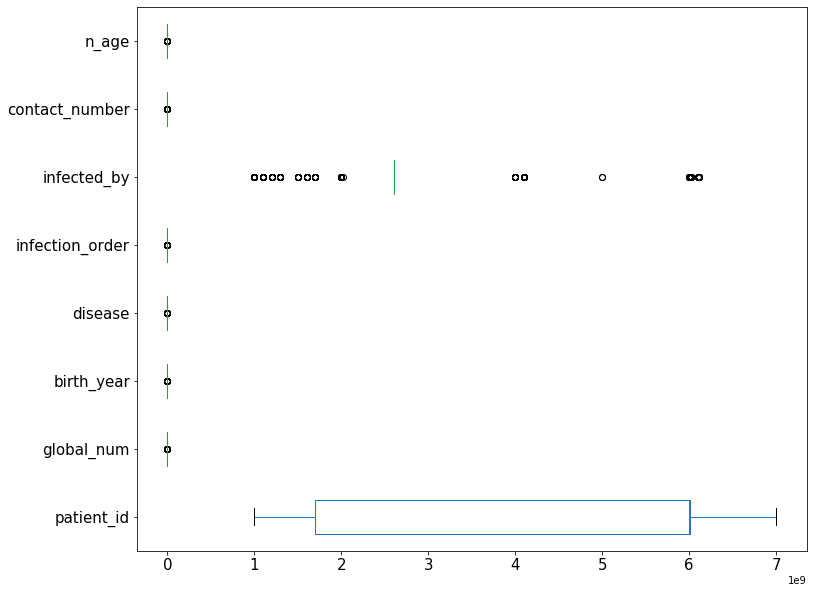

In [21]:
boxplot = df.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,10))

**<font color='teal'> Create dummy features for object type features. </font>**

In [22]:
#define the response variable
y=df[['state']]

#Dummy feature creation
def dumdum(df, features_to_exclude):
    dfo = df.select_dtypes(include=['object'])
    du = pd.get_dummies(dfo.drop(features_to_exclude,axis =1))
    dfn = df.select_dtypes(exclude=['object'])
    df = dfn.merge(du,left_index=True,right_index=True)
    return df   

df = dumdum(df.drop(['patient_id'],axis =1) ,['state'])

### Split into test and train subsamples

In [23]:
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

### Scale data in prep for modeling

In [24]:
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot

### Fit Random Forest Classifier

In [26]:
import time
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = clf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
#lr_auc = roc_auc_score(y_test, lr_probs)
ac = accuracy_score(y_test, y_pred)
#lo = log_loss(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)
#print('Training Data Set 1 RandomForest: ROC AUC=%.3f' % (lr_auc))
print('Training Data Set 1 Random Forest: Accuracy=%.3f' % (ac))
#print('Training Data Set 1 Random Forest: Log loss=%.3f' % (lo))
print('Training Data Set 1 Random Forest: f1-score=%.3f' % (f1))

C:\Users\andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Training Data Set 1 Random Forest: Accuracy=0.847
Training Data Set 1 Random Forest: f1-score=0.817


### Create Confusion Matrix plots

In [27]:
class_names=['isolated','released','deceased'] # name  of classes

Confusion matrix, without normalization
[[  6   1   0   0]
 [  0 340   0  11]
 [  0   1  16   0]
 [  0  55   0  14]]
Normalized confusion matrix
[[0.86 0.14 0.   0.  ]
 [0.   0.97 0.   0.03]
 [0.   0.06 0.94 0.  ]
 [0.   0.8  0.   0.2 ]]


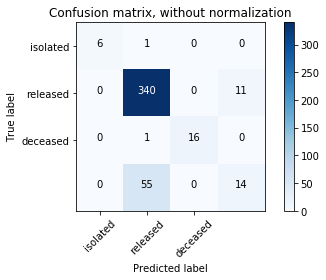

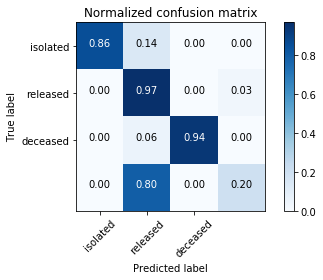

In [28]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

### Plot feature importances

30


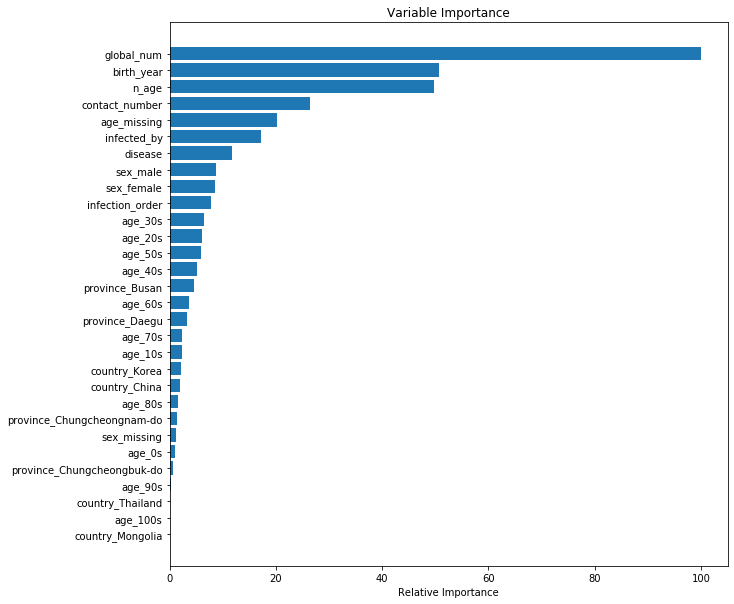

In [29]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()